In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

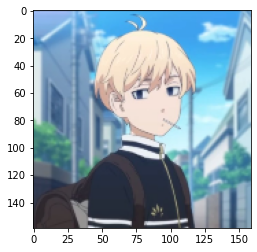

In [2]:
original_img = cv.imread('output.png')
RGB_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

## Sobel Edge Detector

In [3]:
def sobelDetector(img, scale = 1, delta = 0, ddepth = cv.CV_16S):
    src = img.copy()
    src = cv.GaussianBlur(src, (3, 3), 0)
    gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad,abs_grad_x,abs_grad_y

In [4]:
sobel_img,sobel_x,sobel_y = sobelDetector(RGB_img)

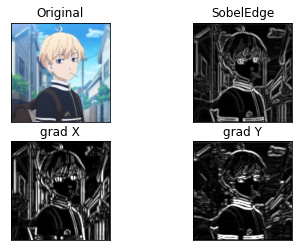

In [5]:
plt.subplot(221),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobel_img,cmap='gray'),plt.title('SobelEdge')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(sobel_x,cmap='gray'),plt.title('grad X')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sobel_y,cmap='gray'),plt.title('grad Y')
plt.xticks([]), plt.yticks([])
plt.show()

## Lapacian Edge Detector

In [6]:
def laplaceDetector(img,kernel_size = 3,ddepth = cv.CV_16S):
    src = img.copy()
    src = cv.GaussianBlur(src, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)
    abs_dst = cv.convertScaleAbs(dst)
    return abs_dst

In [7]:
laplace_image = laplaceDetector(RGB_img,3)

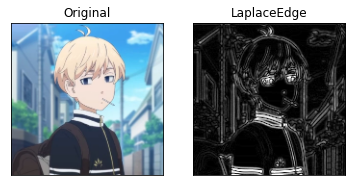

In [8]:
plt.subplot(121),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplace_image,cmap='gray'),plt.title('LaplaceEdge')
plt.xticks([]), plt.yticks([])
plt.show()

## Canny Detector

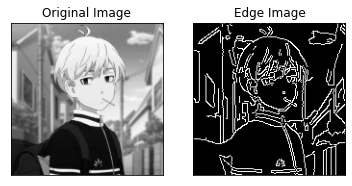

In [9]:
img = cv.imread('output.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## show all

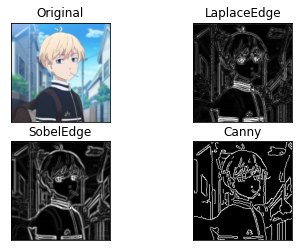

In [10]:
plt.subplot(221),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(laplace_image,cmap='gray'),plt.title('LaplaceEdge')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(sobel_img,cmap='gray'),plt.title('SobelEdge')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.show()